# Yelp Data (Initial Exploration)

Import the python scientific suite

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division
%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

/Users/Franklin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
file_dir = '/Volumes/1TB_BAY/yelp_dataset_challenge_academic_dataset/'

In [3]:
ls /Volumes/1TB_BAY/yelp_dataset_challenge_academic_dataset/

Dataset_Challenge_Academic_Dataset_Agreement.pdf
Yelp_Dataset_Challenge_Terms_round_7.pdf
json_to_csv_converter.py*
review_without_text.csv
review_without_text_year.csv
reviews_neighborhood.csv
yelp_academic_dataset_business.csv
yelp_academic_dataset_business.json
yelp_academic_dataset_checkin.json
yelp_academic_dataset_review.csv
yelp_academic_dataset_review.json
yelp_academic_dataset_review_top100.csv
yelp_academic_dataset_review_top100_clean.csv
yelp_academic_dataset_review_top30.csv
yelp_academic_dataset_review_top40.csv
yelp_academic_dataset_tip.json
yelp_academic_dataset_user.json


In [4]:
b = pd.read_csv(file_dir + 'yelp_academic_dataset_business.csv') #b for business

/Users/Franklin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,4,7,17,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
name, counts = np.unique(b['name'], return_counts = True)
counts_df = pd.DataFrame(data = {'name': name, 'counts':counts})
counts_df.sort_values(by = 'counts', ascending = False).head(100).to_csv('top100_chains.csv')
print(counts_df.sort_values(by = 'counts', ascending = False).head(20).to_latex())

\begin{tabular}{lrl}
\toprule
{} &  counts &                    name \\
\midrule
47285 &     483 &               Starbucks \\
47872 &     365 &                  Subway \\
32246 &     345 &              McDonald's \\
55814 &     200 &               Walgreens \\
49034 &     180 &               Taco Bell \\
39054 &     155 &               Pizza Hut \\
8561  &     147 &             Burger King \\
56135 &     144 &                 Wendy's \\
52181 &     134 &           The UPS Store \\
37041 &     120 &           Panda Express \\
16257 &     119 &          Dunkin' Donuts \\
5291  &     118 &         Bank of America \\
21597 &     114 &             Great Clips \\
56127 &     108 &        Wells Fargo Bank \\
11833 &     107 &                Circle K \\
15746 &      97 &          Domino's Pizza \\
11495 &      95 &  Chipotle Mexican Grill \\
25862 &      95 &            Jimmy John's \\
26500 &      93 &                     KFC \\
54057 &      88 &          US Post Office \\
\bottomrule
\end{ta

In [62]:
import ast
categories = [ast.literal_eval(i) for i in b['categories']] #convert the categories string to a list of lists
flat_categories = [item for sublist in categories for item in sublist] #flatten this list so the most common categories can be explored
categ_df = pd.DataFrame(data = {'category': np.unique(flat_categories, return_counts = True)[0],\
                                'counts': np.unique(flat_categories, return_counts = True)[1]})
categ_df.sort_values(by = 'counts', ascending = False).head(100).to_csv('top100_categories.csv')
print(categ_df.sort_values(by = 'counts', ascending = False).head(20).to_latex())

\begin{tabular}{llr}
\toprule
{} &                   category &  counts \\
\midrule
701 &                Restaurants &   25071 \\
735 &                   Shopping &   11233 \\
326 &                       Food &    9250 \\
79  &              Beauty \& Spas &    6583 \\
386 &           Health \& Medical &    5121 \\
553 &                  Nightlife &    5088 \\
407 &              Home Services &    4785 \\
70  &                       Bars &    4328 \\
57  &                 Automotive &    4208 \\
491 &             Local Services &    3468 \\
3   &                Active Life &    3103 \\
299 &                    Fashion &    3078 \\
289 &  Event Planning \& Services &    2975 \\
300 &                  Fast Food &    2851 \\
631 &                      Pizza &    2657 \\
521 &                    Mexican &    2515 \\
424 &            Hotels \& Travel &    2495 \\
19  &     American (Traditional) &    2416 \\
712 &                 Sandwiches &    2364 \\
43  &       Arts \& Entertainment &   

In [8]:
import csv
from textstat.textstat import textstat
import pattern.en as en

In [28]:
def ReadJson(myfile){}
    # read the entire file into a python array
    with open(myfile, 'rb') as f:
        data = f.readlines()

    # remove the trailing "\n" from each line
    data = map(lambda x: x.rstrip(), data)

    # each element of 'data' is an individual JSON object.
    # i want to convert it into an *array* of JSON objects
    # which, in and of itself, is one large JSON object
    # basically... add square brackets to the beginning
    # and end, and have all the individual business JSON objects
    # separated by a comma
    data_json_str = "[" + ','.join(data) + "]"

    # now, load it into pandas
    data_df = pd.read_json(data_json_str)
    
    return data_df

SyntaxError: invalid syntax (<ipython-input-28-2e9d324a193c>, line 1)

In [26]:
r = ReadJson('')

ValueError: Trailing data

In [14]:
r = pd.read_csv(file_dir + 'yelp_academic_dataset_review_top40.csv', quoting = csv.QUOTE_NONE, sep = ',',error_bad_lines = False) #r for review

In [19]:
r = pd.read_csv(file_dir + 'yelp_academic_dataset_review_top30.csv')

In [64]:
pd.read_json(file_dir + 'yelp_academic_dataset_review.json')

ValueError: Trailing data

In [28]:
print(textstat.flesch_reading_ease(r['text'][0]))
print(textstat.flesch_kincaid_grade(r['text'][0]))

72.16
7.2


In [49]:
def ReviewMetrics(r):
    fk_re = []
    fk_gr = []
    
    for rev in r['text']:
        fk_re.append(textstat.flesch_reading_ease(rev)) #reading ease
        fk_gr.append(textstat.flesch_kincaid_grade(rev)) #grade reading level
    
    return pd.DataFrame(data = [fk_re, fk_gr]).T

In [50]:
ReviewMetrics(r)

,0,1
0,72.16,7.2
1,68.77,6.4
2,84.68,4.4
3,90.77,2.1
4,79.60,6.4
5,84.68,4.4
6,96.18,2.1
7,70.80,5.6
8,87.05,5.6
9,74.19,6.4


In [6]:
# import modules
import json
import glob

# read in yelp data
yelp_files = file_dir + "yelp_academic_dataset_review.json"
yelp_data = []
with open(yelp_files) as f:
    for line in f:
        yelp_data.append(json.loads(line))
        
r = pd.DataFrame(yelp_data) #successful readin of part of the DF.

In [7]:
r.columns

Index([u'business_id', u'date', u'review_id', u'stars', u'text', u'type',
       u'user_id', u'votes'],
      dtype='object')

In [9]:
#r.to_csv(file_dir + 'review_without_text.csv', columns = ['review_id','user_id','business_id','date','stars','type','votes'])

In [10]:
#r = pd.read_csv(file_dir + 'review_without_text.csv')

In [5]:
from astropy.time import Time
t_column = []
for t in r['date']: #for each time
    t_column.append(Time(t).decimalyear) #convert the time to jd and add it to a new column

NameError: name 'r' is not defined

In [ ]:
#r['year'] = t_column
#r.to_csv(file_dir + 'review_without_text_year.csv', columns = ['review_id','user_id','business_id','year','date','stars'])

In [56]:
#r = pd.read_csv(file_dir + 'review_without_text_year.csv')
r = pd.read_csv(file_dir + 'reviews_neighborhood.csv')

/Users/Franklin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,14,15,16,17,23,26,35,36,38,39,43,46,55,58,61,69,71,80,86,88,92,95,100,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
#cr = r[~r['state'].isin(['AL', 'CA', 'MN', 'NM', 'TX'])]
#cr.to_csv(file_dir + 'reviews_neighborhood.csv')

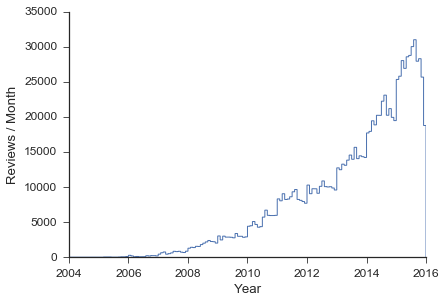

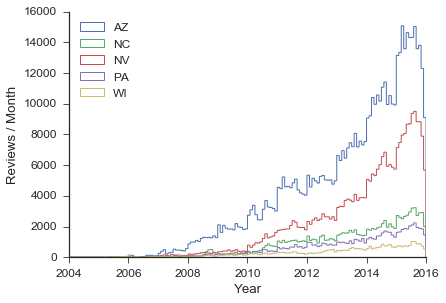

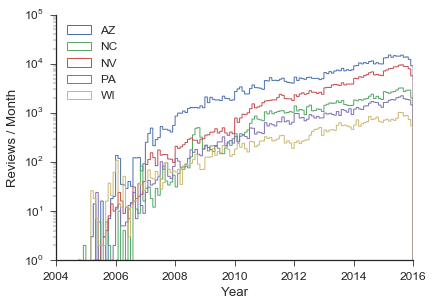

In [74]:
plt.hist(r['year'], range = [2004,2016], bins = 144, histtype = 'step', lw = 1)
sns.despine()
plt.xlim(2004,2016)
plt.ylabel('Reviews / Month')
plt.xlabel('Year')
plt.savefig('./paper/' + 'total_review_trend.png', fmt = 'png', dpi = 300)

plt.figure()
for state in np.unique(r['state']):
    plt.hist(r['year'][(r['state'] == state)], range = [2004,2016], bins = 144, histtype = 'step', lw = 1, label = state)
sns.despine()
plt.xlim(2004,2016)
plt.ylabel('Reviews / Month')
plt.xlabel('Year')
plt.legend(loc = 2)
plt.savefig('./paper/' + 'state_review_trend.png', fmt = 'png', dpi = 300)

plt.figure()
for state in np.unique(r['state']):
    plt.hist(r['year'][(r['state'] == state)], range = [2004,2016], bins = 144, histtype = 'step', lw = 1, label = state)
sns.despine()
plt.xlim(2004,2016)
plt.ylabel('Reviews / Month')
plt.xlabel('Year')
plt.ylim(1,100000)
plt.yscale('log')
plt.legend(loc = 2)
plt.savefig('./paper/' + 'state_review_trend_log.png', fmt = 'png', dpi = 300)

In [60]:
business, bcounts = np.unique(r['business_id'], return_counts = True)

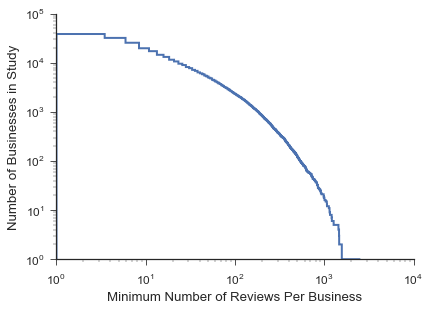

In [61]:
plt.hist(bcounts, bins = 1000, cumulative = -1,\
         histtype = 'step', lw = 2)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of Businesses in Study')
plt.xlabel('Minimum Number of Reviews Per Business')
sns.despine()
plt.savefig('./paper/review_business_hist.png', fmt = 'png', dpi = 300)

In [21]:
def ResExam(x, y, bins = 10):
    
    '''
    Dependencies:
        import scipy
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
    
    '''
    
    bm, be, _ = scipy.stats.binned_statistic(x, y, statistic = 'mean', bins = bins)
    bs, _, _ = scipy.stats.binned_statistic(x, y, statistic = 'std', bins = bins)
    berr, _ ,_ = scipy.stats.binned_statistic(x, y, statistic = scipy.stats.sem, bins = bins)

    bin_width = (be[1] - be[0]) #compute the bin width, to calculate the bin centers
    bc = be[1:] - bin_width/2 #compute the bin centers

    fig = plt.figure()
    #plt.scatter(x,y, lw = 0, s = 0.5, alpha = 1, c = 'black') #lightly scatter the original data
    plt.errorbar(bc, bm, berr, fmt = '.',color = 'red', lw = 1) #now draw the binned statistic
    plt.axhline(0, c = 'grey', lw = 0.5) #plot the 0 residual line

    plt.gca().yaxis.set_label_coords(-0.12, 0.5)
    sns.despine()
    
    return bc, bm, berr, np.std(y), fig

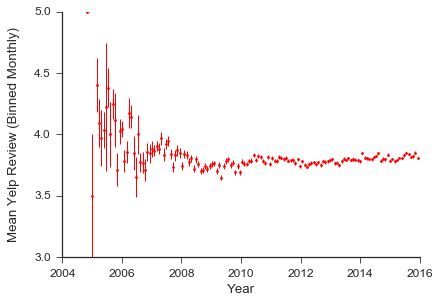

In [62]:
ResExam(r['year'], r['stars_x'], bins = 144)
plt.ylim(3,5)
plt.xlabel('Year')
plt.ylabel('Mean Yelp Review (Binned Monthly)')
plt.savefig('./paper/all_review_trend.png',fmt = 'png', dpi = 300)

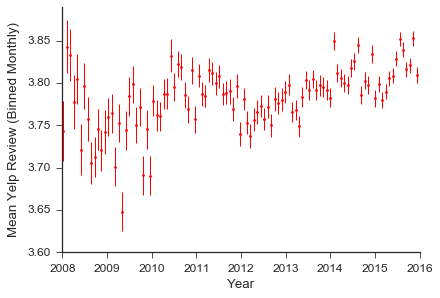

In [64]:
ResExam(r['year'], r['stars_x'], bins = 144)
plt.ylim(3.6,3.89)
plt.xlim(2008,2016)
plt.xlabel('Year')
plt.ylabel('Mean Yelp Review (Binned Monthly)')
plt.gca().ticklabel_format(useOffset=False)
plt.savefig('./paper/all_review_trend_detail.png',fmt = 'png',dpi = 300)

In [68]:
st = pd.read_csv('static_stats.csv')
rst = pd.merge(r,st, on = 'z_hood', how = 'left')

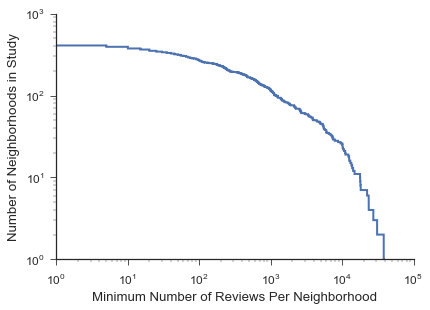

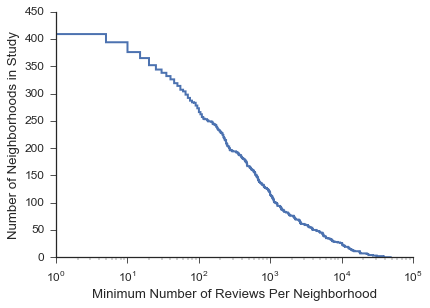

In [72]:
plt.figure()
plt.hist(np.unique(r['z_hood'], return_counts = True)[1],\
         bins = 10000, range = [0,50000], cumulative = -1, histtype = 'step',
        lw = 2)
sns.despine()
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Number of Neighborhoods in Study')
plt.xlabel('Minimum Number of Reviews Per Neighborhood')

plt.figure()
plt.hist(np.unique(r['z_hood'], return_counts = True)[1],\
         bins = 10000, range = [0,50000], cumulative = -1, histtype = 'step',
        lw = 2)
sns.despine()
plt.xscale('log')
plt.ylabel('Number of Neighborhoods in Study')
plt.xlabel('Minimum Number of Reviews Per Neighborhood')
plt.savefig('./paper/review_neighborhood_hist.png', fmt = 'png', dpi = 300)

In [ ]:
plt.hist(np.unique(r['z_hood'], return_counts = True)[1],\
         bins = 100, range = [0,50000], cumulative = -1, histtype = 'step',
        lw = 2)
sns.despine()
plt.yscale('log')
plt.xscale('log')

In [67]:
plt.scatter(np.unique(r['z_hood'], return_counts = True)[1], rst['n'])

NameError: name 'rst' is not defined

In [51]:
rst

,Unnamed: 0_x,Unnamed: 0_x,review_id,user_id,business_id,year,date,stars_x,Unnamed: 0_y,attributes.Ambience.divey,...,loop_i,state_y,county,city_y,neighborhood,lon,lat,lon_width,lat_width,bbox_area
0,800,800,6ZWmWypGMdnwwavY8ykXlg,iTmWHtltCtk0Gm55AOxrUA,uI0LvTXFACid1308KFO5ew,2009.624658,2009-08-17,4,0,NaN,...,5123,PA,Allegheny,Pittsburgh,Hays,-79.947974,40.392222,0.044954,0.035874,5.378061
1,801,801,3m6vLe955opYMSrTrlLIKw,JEvkfVPf_DuhX-ntE5L6bQ,uI0LvTXFACid1308KFO5ew,2011.197260,2011-03-14,2,0,NaN,...,5123,PA,Allegheny,Pittsburgh,Hays,-79.947974,40.392222,0.044954,0.035874,5.378061
2,802,802,MkHaKWwZ_OngdUsMt_xAqg,QOdrDkYXhqA8jtPzfpugWQ,uI0LvTXFACid1308KFO5ew,2011.438356,2011-06-10,2,0,NaN,...,5123,PA,Allegheny,Pittsburgh,Hays,-79.947974,40.392222,0.044954,0.035874,5.378061
3,803,803,gB-kzO-Jg_u2p7Cmf9xG_w,qPGLUQUG43b3aBZKDUBlMw,uI0LvTXFACid1308KFO5ew,2011.586301,2011-08-03,4,0,NaN,...,5123,PA,Allegheny,Pittsburgh,Hays,-79.947974,40.392222,0.044954,0.035874,5.378061
4,804,804,cCh6xPIcV6P2ben4bCsq7Q,lJsCDFtnR2-AMhDdWtCRug,uI0LvTXFACid1308KFO5ew,2011.679452,2011-09-06,3,0,NaN,...,5123,PA,Allegheny,Pittsburgh,Hays,-79.947974,40.392222,0.044954,0.035874,5.378061
5,805,805,QraufK_S6pdcLHXz15n8gQ,7R79mN6iJNU6o0CI1aBesA,uI0LvTXFACid1308KFO5ew,2012.459016,2012-06-17,4,0,NaN,...,5123,PA,Allegheny,Pittsburgh,Hays,-79.947974,40.392222,0.044954,0.035874,5.378061
6,806,806,p1j9N_P02v0oN6nWWPwDSg,nEYPahVwXGD2Pjvgkm7QqQ,uI0LvTXFACid1308KFO5ew,2012.538251,2012-07-16,3,0,NaN,...,5123,PA,Allegheny,Pittsburgh,Hays,-79.947974,40.392222,0.044954,0.035874,5.378061
7,807,807,6SHLQH067F_M9ZZQ48TjLA,yIhhNAk3aAVUChiUhqpFaA,uI0LvTXFACid1308KFO5ew,2013.032877,2013-01-13,1,0,NaN,...,5123,PA,Allegheny,Pittsburgh,Hays,-79.947974,40.392222,0.044954,0.035874,5.378061
8,808,808,I0CGTPDXtQr9wmpVhAasKQ,qUPwH9Vvx65RxcGgZL-f7A,uI0LvTXFACid1308KFO5ew,2013.213699,2013-03-20,5,0,NaN,...,5123,PA,Allegheny,Pittsburgh,Hays,-79.947974,40.392222,0.044954,0.035874,5.378061
9,809,809,fYyklVeVe9Bcj71eA8UwWA,WzaaorVCmUTQvu4mScunNg,uI0LvTXFACid1308KFO5ew,2013.591781,2013-08-05,3,0,NaN,...,5123,PA,Allegheny,Pittsburgh,Hays,-79.947974,40.392222,0.044954,0.035874,5.378061
